#Introducción
Realizar una regresión logistica con un archivo de excel que muestra la probabilidad de las personas que puedan adquirir un prestamo en el banco mediante los datos que se presentan y elegir los datos mas importantes que pueden servir.

Se importan las librerias necesarias

In [115]:
import pandas as pd # Se utiliza para leer el archivo CSV y manipular los datos
import matplotlib.pyplot as plt #  Se utiliza aquí para trazar las líneas de regresión y ver los resultados
from sklearn.linear_model import LogisticRegression # se utiliza para crear y ajustar el modelo de regresión logística a los datos
from sklearn.model_selection import train_test_split # Se utiliza para dividir los datos en conjuntos de entrenamiento y prueba antes de ajustar el modelo
from sklearn.metrics import classification_report # Se utiliza para generar el informe de clasificación para evaluar el rendimiento del modelo
import numpy as np #  Se utiliza para crear un rango de edades y manipular los datos para trazar las líneas de regresión

Se importa el archivo desde el drive donde se sacará la informacion del excel e imprime una tabla con los datos que se encuentran

In [116]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/dataset_banco_clean (1).csv"
data = pd.read_csv(file_path, encoding='latin1')
data.head() # Muestra los primeros registros

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


Se seleccionan las caracteristicas de los datos para utilizar en el modelo de regresion logistica

se utiliza age como variable independiente


se utilza loan como variable dependiente

In [117]:
# Seleccionar las características (X) y la variable objetivo (y)
X = data[['age']]
y = data['loan']

Colors es un diccionario que asigna colores a cada categoria

In [118]:
colors = {'yes': 'green', 'no': 'red'}

Este es un proceso de asignación de números únicos a las categorías que se realizan, para poder asignar un color único a cada categoría

In [119]:
unique_loan, loan_indices = pd.factorize(y) # se utiliza para asignar un número único a cada categoría en la variable

Se están generando gráficos de dispersión para cada categoría de trabajo, utilizando los colores asignados a cada categoría

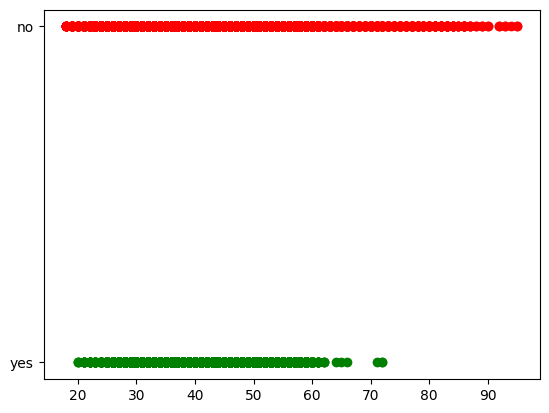

In [120]:
for category, color in colors.items():
    category_indices = y[y == category].index
    plt.scatter(X.loc[category_indices], y.loc[category_indices], c=color, label=category)

Se utiliza para asignar valores numéricos únicos a cada categoría de la variable objetivo

In [121]:
_, y_encoded = pd.factorize(y)

Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split() de la biblioteca scikit-learn

In [129]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Se ajusta el modelo de regresión logística utilizando los datos de entrenamiento

In [124]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

El informe de clasificación proporciona una evaluación detallada del rendimiento del modelo de regresión logística en los datos de prueba

In [126]:
# Informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      7570
         yes       1.00      1.00      1.00      1468

    accuracy                           1.00      9038
   macro avg       1.00      1.00      1.00      9038
weighted avg       1.00      1.00      1.00      9038



Por ultimo, calculará las probabilidades de pertenecer a cada categoría de 'loan' para diferentes rangos de edad utilizando el modelo de regresión logística entrenado.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


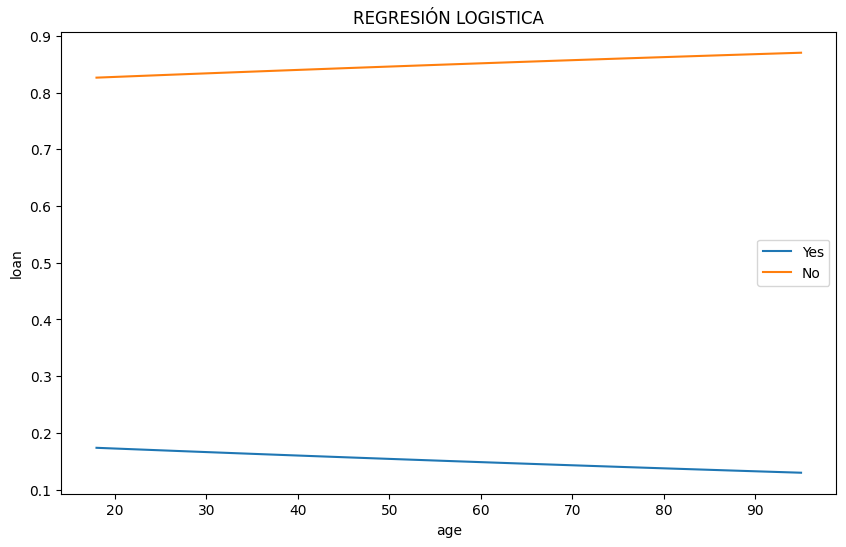

In [143]:
# Calcular las probabilidades de pertenecer a cada categoría
age_range = np.arange(X['age'].min(), X['age'].max() + 1).reshape(-1, 1)
probabilities = model.predict_proba(age_range)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(age_range, probabilities[:, 1], label='Yes')  # Probabilidad de pertenecer a la clase 'yes'
plt.plot(age_range, probabilities[:, 0], label='No')  # Probabilidad de pertenecer a la clase 'no'
plt.xlabel('age')
plt.ylabel('loan')
plt.title('REGRESIÓN LOGISTICA')
plt.legend()
plt.show()

# Conclusión
Al ver la gráfica, se nota que mientras más grande es la edad, menos probabilidad hay de que se obtenga un préstamo. Por otro lado, si se es joven, es más probable que se autorice un préstamo.

En general, este análisis brinda una idea inicial de cómo la edad puede estar relacionada con la probabilidad de tener un préstamo, pero se requiere un análisis más completo de otros factores para tener conclusiones más sólidas y completas.
